# Exercise: Diabetes Model

In this exercise, we're going to take the knowledge we gained from the lesson and apply it to the [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). This well known dataset already has it's data cleaned and normalized, so no need to do any of those steps. The steps required to complete this exercise are as follows:

1. Load the diabetes dataset into a dataframe.
2. Check the table summary to show that indeed the mean is zero for all features.
3. Split the dataset into train, validation, and test sets
4. Use a linear regression `Ridge` model to fit and score:
    1. Fit and score on the whole dataset
    2. Fit on train, score on validation, using default model
    3. Fit on train, score on validation, using hyperparameters model
    4. Fit on train, score on test, using hyperparameterized model
5. Plot all scores in a bar graph

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [3]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [8]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])

# Include the target as well
df['target'] = diabetes['target']

In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [10]:
# Describe df using table summary.
# No need to normalize, near zero mean.
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [11]:
# train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, train_size=0.8, random_state=0)

# train: 0.6 | validation: 0.2
df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=0)

# Final dataset sizes: train: 0.6, validation: 0.2, text: 0.2

In [18]:
# How does the model perform on the entire dataset and default model parameters
reg = Ridge().fit(df[diabetes['feature_names']], df['target'])

all_df_score = reg.score(df[diabetes['feature_names']], df['target'])
all_df_score

0.4512313946799055

In [19]:
# How does the model perform on the training dataset and default model parameters
# Remember we use the validation dataset score the model
reg = Ridge().fit(df_train[diabetes['feature_names']], df_train['target'])
val_df_score = reg.score(df_train[diabetes['feature_names']], df_train['target'])
val_df_score

0.4426772861175259

In [27]:
# How does the model perform on the training dataset and different model parameters
# Change alpha, solver, and max_iter
reg_h = Ridge(alpha=0.01, solver="saga", max_iter=10000).fit(df_train[diabetes['feature_names']], df_train['target'])
val_df_h_score = reg_h.score(df_train[diabetes['feature_names']], df_train['target'])
val_df_h_score

0.55683873714516

In [28]:
# Use optimized model on the held out test dataset.
test_df_h_score = reg_h.score(df_test[diabetes['feature_names']], df_test['target'])
test_df_h_score

0.3399005738314773

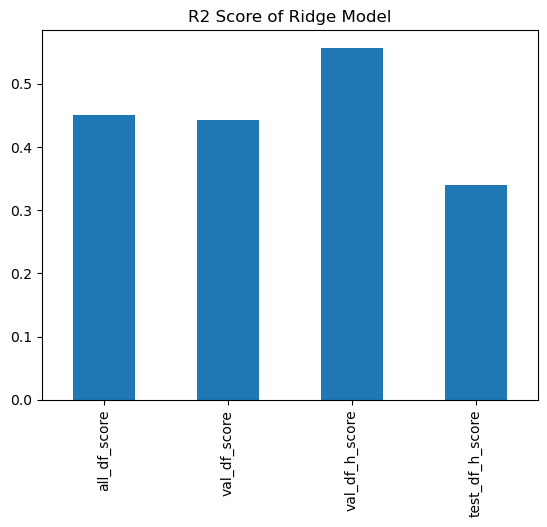

In [33]:
# Bar plot of all scores from each model fit: all_df_score, val_df_score, val_df_h_score, test_df_h_score
pd.Series({
    "all_df_score": all_df_score, 
    "val_df_score": val_df_score,
    "val_df_h_score": val_df_h_score,
    "test_df_h_score": test_df_h_score
}).plot(kind="bar", legend=False, title="R2 Score of Ridge Model").figure 